8.218924


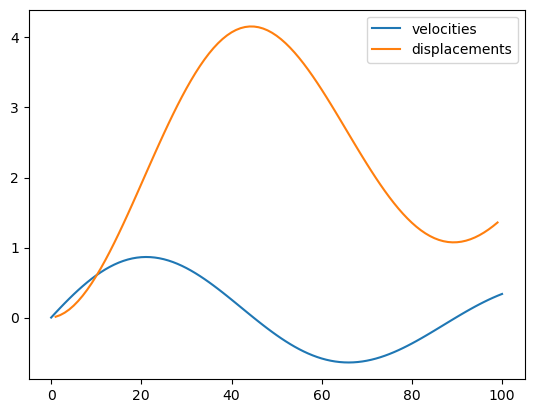

In [1]:
# Exercise 5.1.a

import numpy as np
import matplotlib.pylab as plt

# a).

v = np.loadtxt("velocities.txt",float)

tpoints = v[:,0]
vpoints = v[:,1]

# Deletes first and last time values
indices_to_delete = [0, -1]
new_t = np.delete(tpoints, indices_to_delete)

va = v[0,1]
vb = v[100,1]

T = tpoints[-1]-tpoints[0]

h = np.mean(np.diff(tpoints))

s = 0.5*(va+vb)
suma = 0.0
inte = []

for i in range(1, len(vpoints)-1):
    suma += vpoints[i]
    inte.append(h*s*suma)

xpoints = np.array(inte)

disp = h*(s+suma)

print("{:.6f}".format(disp))

#b)

plt.plot(tpoints,vpoints, label="velocities")
plt.plot(new_t,xpoints, label="displacements")
plt.legend()

In [49]:
# Exercise 5.2

def f(x):
    return x**4-2*x+1

N = 100
a = 0.0
b = 2.0
h = (b-a)/N

s = f(a)+f(b)
s_imp = 0.0
s_par = 0.0

# Sum over the odd k terms
for i in range(1,N,2):
    s_imp += f(a+i*h)

# Sum over the k even terms    
for j in range(2,N,2):
    s_par += f(a+j*h)

print((h/3)*(s+4*s_imp+2*s_par))


4.400000042666668


E(x) = 0.886207


Text(0, 0.5, 'E(x)')

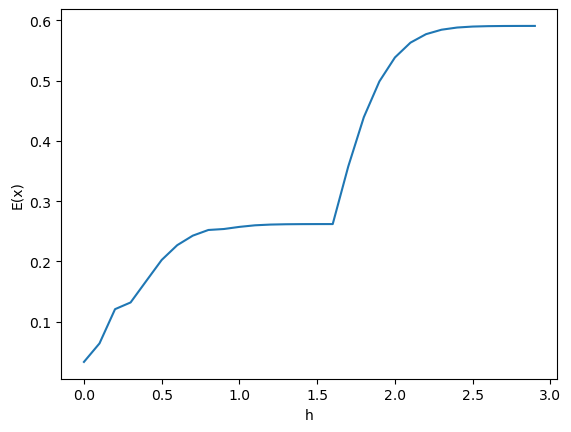

In [70]:
# Exercise 5.3

import numpy as np 
from math import exp
import matplotlib.pylab as plt

# a)

def f(x):
    return exp(-x**2)

N = 30
a = 0.0
b = 3.0
h = (b-a)/N

s = f(a)+f(b)
s_imp = 0.0
s_par = 0.0

imp_arr = []
par_arr = []
# Sum over the odd k terms
for i in range(1,N,2):
    s_imp += f(a+i*h)
    imp_arr.append(s_imp)

# Sum over the k even terms    
for j in range(2,N,2):
    s_par += f(a+j*h)
    par_arr.append(s_par)

tot = (h/3)*(s+4*s_imp+2*s_par)

print("E(x) =", "{:.6f}".format(tot))

# b)

term_arr = []
term_arr.append(s)

#const = h/3
sum_odd = (4*h/3)*np.array(imp_arr)
sum_even = (2*h/3)*np.array(par_arr)
term = (h/3)*np.array(term_arr)

tot_arr = np.hstack((term,sum_odd,sum_even))
#print(tot_arr)
tot_arr.sort()

h_vals = np.arange(0,3,0.1)

plt.plot(h_vals,tot_arr)
plt.xlabel("h")
plt.ylabel("E(x)")

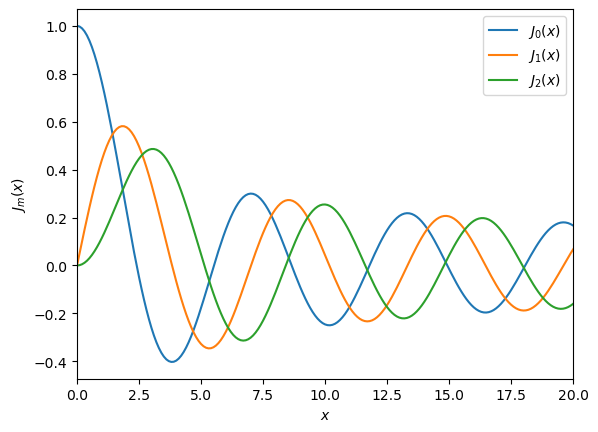

In [61]:
# Exercise 5.4 a): The diffraction limit of a telescope

import numpy as np
import matplotlib.pyplot as plt

def bessel(m,x,theta):
    return np.cos(m*theta-x*np.sin(theta))

N = 100
a = 0.0
b = np.pi
h = (b-a)/N

# Parameter of the Bessel function
#m = 0

for l in range(3):
    jm_vals = []
    tvals = []
    for k in np.arange(0,20+1,0.1):
        s = bessel(l,k,a)+bessel(l,k,b)
        s_imp = 0.0
        s_par = 0.0
        # Sum over the odd k terms
        for i in range(1,N,2):
            s_imp += bessel(l,k,a+i*h)
        # Sum over the k even terms    
        for j in range(2,N,2):
            s_par += bessel(l,k,a+j*h)
        # Collecting the values of t and values of jm
        jm = (h/3.0)*(s+4*s_imp+2*s_par)/np.pi
        jm_vals.append(jm)
        tvals.append(k)
    # Plotting the Bessel functions 
    plt.plot(tvals, jm_vals, label=f"$J_{l}(x)$")

plt.xlabel(f"$x$")
plt.ylabel(f"$J_m(x)$")
plt.xlim(0,20)
plt.legend()
plt.show()

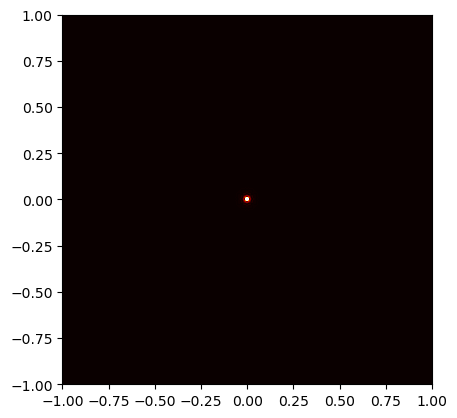

In [131]:
# Exercise 5.4 b): The diffraction limit of a telescope

import numpy as np
import matplotlib.pyplot as plt


def jm(m, x, N=200):
    a, b = 0.0, np.pi
    h = (b - a) / N

    s = np.cos(m*a - x*np.sin(a)) + np.cos(m*b - x*np.sin(b))
    s_imp = sum(np.cos(m*(a+i*h) - x*np.sin(a+i*h)) for i in range(1, N, 2))
    s_par = sum(np.cos(m*(a+i*h) - x*np.sin(a+i*h)) for i in range(2, N, 2))

    return (h/3)*(s + 4*s_imp + 2*s_par)/np.pi

#print(jm(0,0))

# Physical parameters
lam = 5e-3
k = 2*np.pi / lam

# 2D grid
L = 1
npts = 300
x = np.linspace(-L, L, npts)
y = np.linspace(-L, L, npts)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)

# Intensity
intens = np.zeros_like(R)

for i in range(npts):
    for j in range(npts):
        kr = k * R[i, j]
        if kr == 0:
            intens[i, j] = 0.25   # (1/2)^2
        else:
            J1 = jm(1, kr)
            intens[i, j] = (J1/kr)**2

I_norm = intens/intens.max()

plt.imshow(
    I_norm,
    extent=[-L, L, -L, L],
    cmap="hot",
    vmin=0,
    vmax=0.1   # clip everything above this
)

In [30]:
# Exercise 5.7

from math import sin, sqrt

def f(t):
    return sin(sqrt(100*t))**2
    
Nmax = int(20000)
a, b = 0, 1
tol = 1e-6

def adapt_trapezoid(N):
    h = (b-a)/N
    trap = 0.0
    trap = 0.5*(f(a)+f(b)) + sum(f(a+k*h) for k in range(1, N))
    trap *= h
    
    while N <= Nmax:
        mid_sum = sum(f(a+(j+0.5)*h) for j in range(N))
        trap_new = 0.5*(trap + h*mid_sum)
        error = (1/3)*abs(trap_new-trap)
        
        if error < tol:
            print("\nTolerance reached")
            print(f"Integral = {trap_new:.10f}")
            print(f"Estimated error = {error:.3e}")
            print(f"Final N = {2*N}")
            return trap_new, error, 2*N   # Stop here

        trap = trap_new
        N *= 2
        h *= 0.5

N = Nmax
I, err, Nfinal = adapt_trapezoid(N)


Tolerance reached
Integral = 0.4558325273
Estimated error = 4.971e-09
Final N = 40000


Cv(5 K) = 0.309749


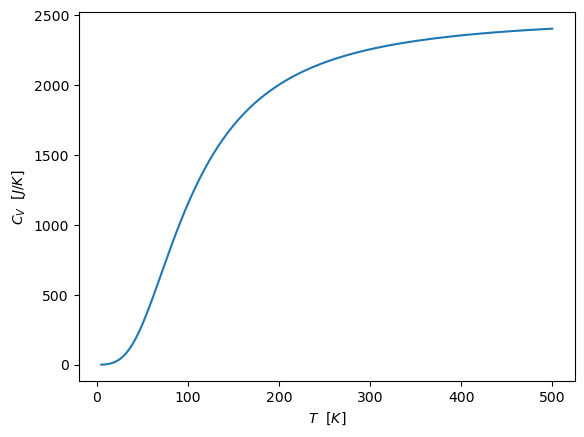

In [28]:
# Exercise 5.9: heat capacity of a solid

import numpy as np
import matplotlib.pyplot as plt

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def cv(T):
    V = 0.001       # volume in m^3
    rho = 6.022e28  # number density
    theta = 428     # Debye temp.
    kb = 1.380e-23  # Boltzmann's constant 
    
    factor = 9*V*rho*kb*(T/theta)**3

    def f(x):
        return factor*(x**4)*np.exp(x)/(np.exp(x)-1)**2

    N = 50
    a = 0.0
    b = theta/T

    # I incorporate Newman's code to compute the sample points and weights.
    # Honestly, I still don't fully grasp the code for gaussxw.
    x,w = gaussxw(N)
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w

    # Perform the integration
    s = 0.0
    for k in range(N):
        s += wp[k]*f(xp[k])
    return s

#a)
print("Cv(5 K) =", "{:.6f}".format(cv(5)))

#b)

T_vals = np.linspace(5,500,495)

cv_vals = []
for k in range(5,500):
    cv_vals.append(cv(k))

plt.plot(T_vals, cv_vals)
plt.xlabel(f"$T~~[K]$")
plt.ylabel(f"$C_V~~[J/K]$")
plt.show()

T = 0.729619


/tmp/ipykernel_38775/1965971762.py:38: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(8*m)/(np.sqrt(amp**4 - x**4))
/tmp/ipykernel_38775/1965971762.py:53: RuntimeWarning: invalid value encountered in scalar multiply
  s += wp[k]*f(xp[k])


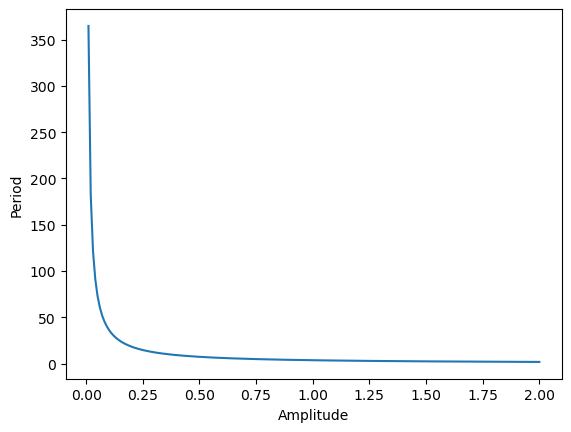

In [9]:
# Exercise 5.10: Period of an anharmonic oscillator

import numpy as np
import matplotlib.pyplot as plt

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def period(amp):
    m = 1       # mass of the particle

    def f(x):
        return np.sqrt(8*m)/(np.sqrt(amp**4 - x**4))

    N = 20
    a = 0.0
    b = amp

    # I incorporate Newman's code to compute the sample points and weights.
    # Honestly, I still don't fully grasp the code for gaussxw.
    x,w = gaussxw(N)
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w

    # Perform the integration
    s = 0.0
    for k in range(N):
        s += wp[k]*f(xp[k])
    return s

#a)
amp = 5
print("T =", "{:.6f}".format(period(amp)))

#b)

amp_vals = np.linspace(0,2,200)

T_vals = []
for k in np.arange(0,2,0.01):
    T_vals.append(period(k))

plt.plot(amp_vals, T_vals)
plt.xlabel("Amplitude")
plt.ylabel("Period")
plt.show()

I/I0 = 1.029519


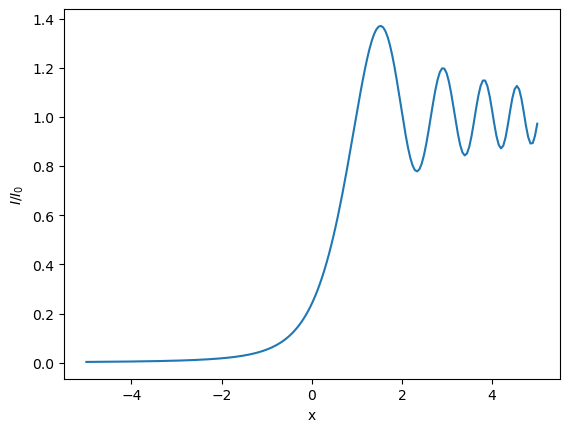

In [18]:
# Exercise 5.11

import numpy as np
import matplotlib.pyplot as plt

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def intens(x):
    lam = 1
    z = 3
    u = x*np.sqrt(2/(lam*z))

    def c(t):
        return np.cos(0.5*np.pi*t**2)

    def s(t):
        return np.sin(0.5*np.pi*t**2)

    N = 50
    a = 0.0
    b = u

    # I incorporate Newman's code to compute the sample points and weights.
    # Honestly, I still don't fully grasp the code for gaussxw.
    x,w = gaussxw(N)
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w

    # Perform the integration
    cu = 0.0
    for k in range(N):
        cu += wp[k]*c(xp[k])
    
    su = 0.0
    for k in range(N):
        su += wp[k]*s(xp[k])

    I = (1/8.0)*((2*cu+1)**2 + (2*su+1)**2)
    
    return I

#b)

x_vals = np.linspace(-5,5,200)

I_vals = []
for k in np.arange(-5,5,0.05):
    I_vals.append(intens(k))

plt.plot(x_vals, I_vals)
plt.xlabel("x")
plt.ylabel(f"$I/I_0$")
plt.show()

In [34]:
# Exercise 5.12:  The Stefan-Boltzmann constant

import numpy as np
import matplotlib.pyplot as plt

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def energy(T):
    kb = 1.3806e-23
    c = 3e8
    hbar = 1.0545e-34
    factor = ((kb*T)**4)/(4.0*(np.pi**2)*(c**2)*hbar**3)

    def f(z):
        return (z**3)/(((1-z)**5)*(np.exp(z/(1-z))-1))
    
    N = 50
    delta = 1e-3
    a = 0.0+delta
    b = 1.0-delta
    
    x,w = gaussxwab(N,a,b)
    
    ene = 0.0
    for k in range(N):
        ene += w[k]*f(x[k])
    # Computing the energy
    W = factor*ene
    # Computing the Stefan-Boltzmann constant    
    sigma = W/T**4
    return W,sigma

T = 5
print("W =", "{:.4e}".format(energy(T)[0]), "J/m^2")
print("sigma =", "{:.4e}".format(energy(T)[1]), "W/(m^2 K^4)")

W = 3.5393e-05 J/m^2
sigma = 5.6629e-08 W/(m^2 K^4)


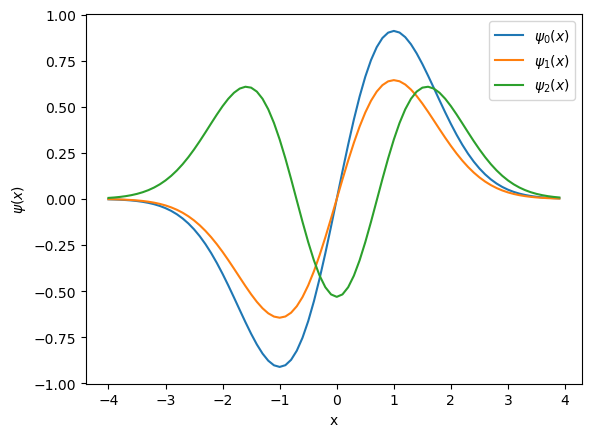

In [64]:
# Exercise 5.12: Quantum uncertainty and the harmonic oscillator

import matplotlib.pyplot as plt
from numpy import arange
from math import sqrt, pi, factorial, exp

# a)

def H(n,x):
    # Define H0, H1
    h0 = 1
    h1 = 2*x
    # Loop to compute next Hn
    for k in range(1,n):
        hnext = 2*x*h1 - 2*k*h0
        h0, h1 = h1, hnext
    return h1

def psi(n,x):
    factor = 1/sqrt((2**n)*factorial(n)*sqrt(pi))
    return factor*exp(-x**2 / 2)*H(n,x)

for i in range(3):
    psi_vals = []
    x_vals = []
    for j in np.arange(-4,4,0.1):
        wf = psi(i,j)
        psi_vals.append(wf)
        x_vals.append(j)
    # Plotting the wave-functions 
    plt.plot(x_vals, psi_vals, label=f"$\\psi_{i}(x)$")
    plt.xlabel("x")
    plt.ylabel(f"$\\psi(x)$")
    plt.legend()

Text(0, 0.5, '$\\psi_30(x)$')

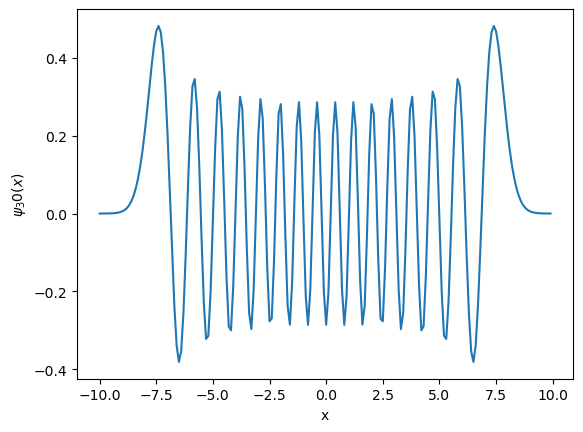

In [68]:
# 5.12 b)
n_val = 30
psi_vals = []
x_vals = []
for j in np.arange(-10,10,0.1):
    wf = psi(n_val,j)
    psi_vals.append(wf)
    x_vals.append(j)
plt.plot(x_vals, psi_vals)
plt.xlabel("x")
plt.ylabel(f"$\\psi_{30}(x)$")

Fz = 5.3755e-09


Text(0, 0.5, '$F_z~[N]$')

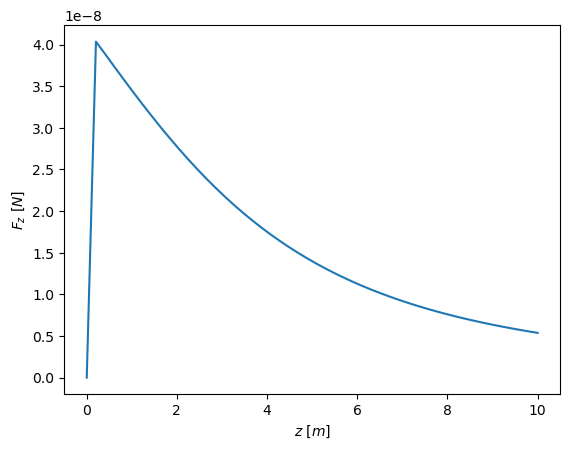

In [59]:
# Exrcie 5.14: Gravitational pull of a uniform sheet

import numpy as np
import matplotlib.pyplot as plt

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def force(z):

    def f(x,y,z):
        return 1/(x**2 + y**2 + z**2)**(3/2)

    G = 6.674e-11   # Cavendish's constant
    sigma = 100     # Mass density

    L = 10

    Nx = 100
    Ny = 100
    a = -L/2
    b = L/2

    x,wx = gaussxwab(Nx,a,b)
    y,wy = gaussxwab(Ny,a,b)

    I = 0.0

    for i in range(Nx):
        for j in range(Ny):
            I += wx[i]*wy[j]*f(x[i], y[j], z)
    return G*sigma*z*I

print("Fz =", "{:.4e}".format(force(10)))

#b)
    
z_vals = np.linspace(0,10,50)
fz_vals = force(z_vals)

plt.plot(z_vals, fz_vals)
plt.xlabel(f"$z~[m]$")
plt.ylabel(f"$F_z~[N]$")

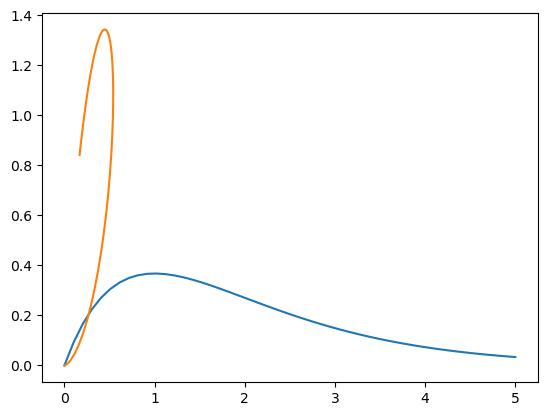

In [2]:
# Exercise 5.17: The gamma function

import numpy as np
import matplotlib.pyplot as plt

# a)
def f(p,x):
    return (x**(p-1))*np.exp(-x)

x_vals = np.linspace(0,5,50)
y_vals = f(2,x_vals)
y2_vals = f(3,x_vals)
y3_vals = f(4,x_vals)

plt.plot(x_vals, y_vals, y2_vals, y3_vals)

In [6]:
# e)

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def gamma(p):
    N = 50
    a = 0.0
    b = 1.0

    def g(p,x):
        c = p-1
        return ((c*x/(1-x))**(p-1))*(np.exp(-c*x/(1-x)))*(c/(1-x)**2)
        
    x,w = gaussxwab(N,a,b)
    
    gam = 0.0
    for k in range(N):
        gam += w[k]*g(p,x[k])
    return gam

print(gamma(1.5))
print(gamma(3))
print(gamma(6))
print(gamma(10))

0.8862272081548264
2.0000000000000657
120.00000000000001
362880.00000000006


In [6]:
# Exercise 5.18

def f(x):
    return x**4 - 2*x + 1

def df(d,x):
    return (f(x+d/2)-f(x-d/2))/d

N = 100
a = 0.0
b = 2.0
h = (b-a)/N
d = 1e-5

s = 0.5*(f(a)+f(b))
suma = 0.0
#s_par = 0.0

for k in range(1,N):
    suma += f(a+k*h)

integral = h*(s+suma) + (h**2/12)*(df(d,a)-df(d,b))
print(integral)


4.399999989333342


Text(0.5, 1.0, 'Magnitude of the electric potential')

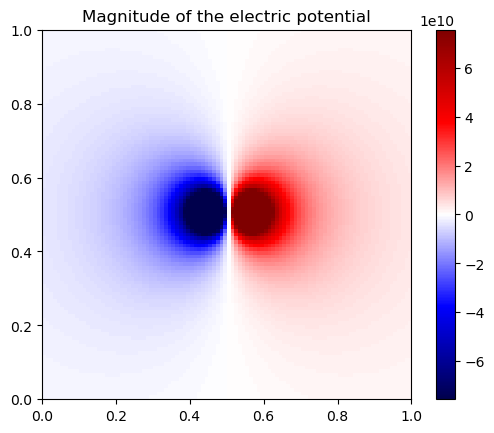

In [80]:
# Exercise 5.21: Electric field of a charge distribution

import numpy as np
import matplotlib.pyplot as plt

# This snippet is based on the one written by Newman in Example 3.1 

e0 = 8.8541e-12     # Vacuum constant in SI units
separation = 0.1    # Separation of the charges in meters
side = 1.0          # Side of the square in meters
points = 100        # Points in the grid 
spacing = side/points
h = spacing

# Calculate the positions of the charges
x1 = side/2 + separation/2
y1 = side/2
x2 = side/2 - separation/2
y2 = side/2

# Values of the charges in Coulombs
q1 = 1     
q2 = -1

# Regularization factor to avoid the singularity at the charges locations
rmin = 1e-9

# Define the potential due to q1
def phi1(x,y):
    r1 = np.sqrt((x-x1)**2 + (y-y1)**2)
    r1 = max(r1, rmin)
    return q1/(4*np.pi*e0*r1)
    
# Define the potential due to q2
def phi2(x,y):
    r2 = np.sqrt((x-x2)**2 + (y-y2)**2)
    r2 = max(r2, rmin)
    return q2/(4*np.pi*e0*r2)

# Create arrays to store the values of the potential and electric field
phi_vals = np.empty([points,points],float)
Ex_vals = np.empty([points,points],float)
Ey_vals = np.empty([points,points],float)
E_vals = np.empty([points,points],float)

for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j 
        # Compute the resulting potential
        phi_vals[i,j] = phi1(x,y)+phi2(x,y)
        # Compute partial derivatives of phi
        dphi1_x = (phi1(x+h/2,y)-phi1(x-h/2,y))/h
        dphi1_y = (phi1(x,y+h/2)-phi1(x,y-h/2))/h
        dphi2_x = (phi2(x+h/2,y)-phi2(x-h/2,y))/h
        dphi2_y = (phi2(x,y+h/2)-phi2(x,y-h/2))/h
        # Compute the electric field E = -\grad(phi)
        Ex_vals[i,j] = -(dphi1_x + dphi2_x)
        Ey_vals[i,j] = -(dphi1_y + dphi2_y)
        E_vals[i,j] = np.sqrt(Ex_vals[i,j]*Ex_vals[i,j] + Ey_vals[i,j]*Ey_vals[i,j]) 
        
# Visualize the magnitude and directions of the electric field 

# Create full grid
Y, X = np.mgrid[0:side:spacing, 0:side:spacing]

plt.figure()

# Visualize the magnitude of the potential
plt.imshow(phi_vals, origin="lower", extent=[0,side,0,side],vmin=-vmax, vmax=vmax,cmap="seismic")
plt.colorbar()
plt.title("Magnitude of the electric potential")

Text(0.5, 1.0, 'Magnitude and direction of the electric field')

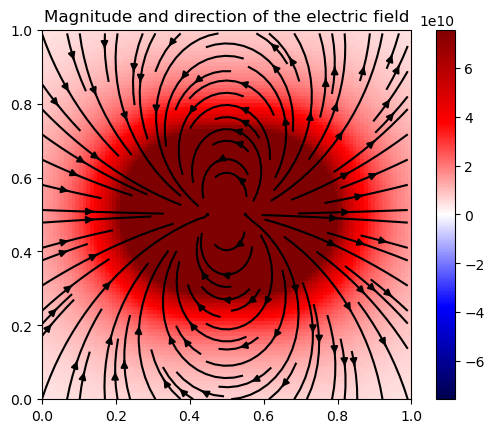

In [81]:
#b)

# Visualize the magnitude of E
plt.imshow(E_vals, origin="lower", extent=[0,side,0,side],vmin=-vmax, vmax=vmax,cmap="seismic")
plt.colorbar()
# Visualize the directions of E
plt.streamplot(X, Y, Ex_vals, Ey_vals, color='black')
plt.title("Magnitude and direction of the electric field")